Visual Analysis of Automobile Sales During Economic Recession Using Matplotlib, Seaborn, and Folium

### Installing Required Libraries


In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install seaborn
# %pip install folium

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

# Importing Data


In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [ ]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


---


# Creating Visualizations for Data Analysis


### Creating a Line chart to show how automobile sales fluctuate from year to year


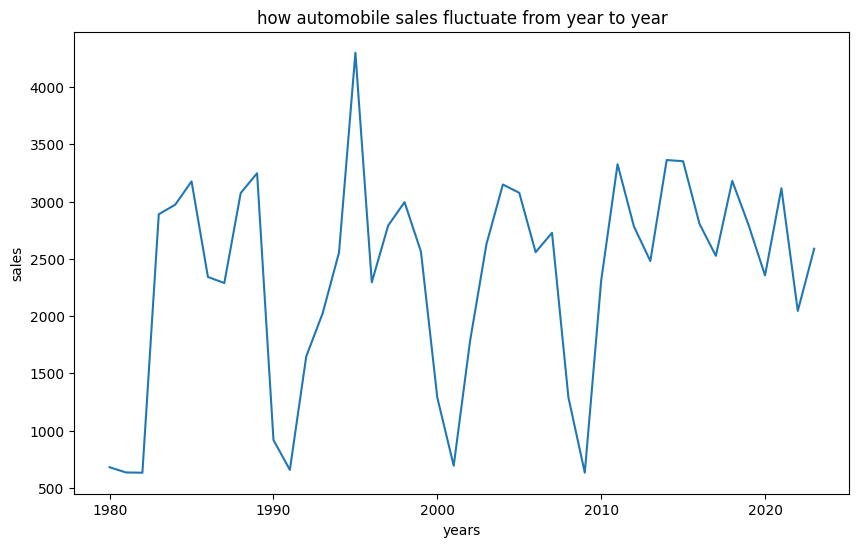

In [ ]:
plt.figure(figsize=(10,6))

df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()

df_line.plot(kind='line')

plt.title('how automobile sales fluctuate from year to year')
plt.xlabel('years')
plt.ylabel('sales')

plt.show()


### Creating a line chart
Including each year and annotations for each recession


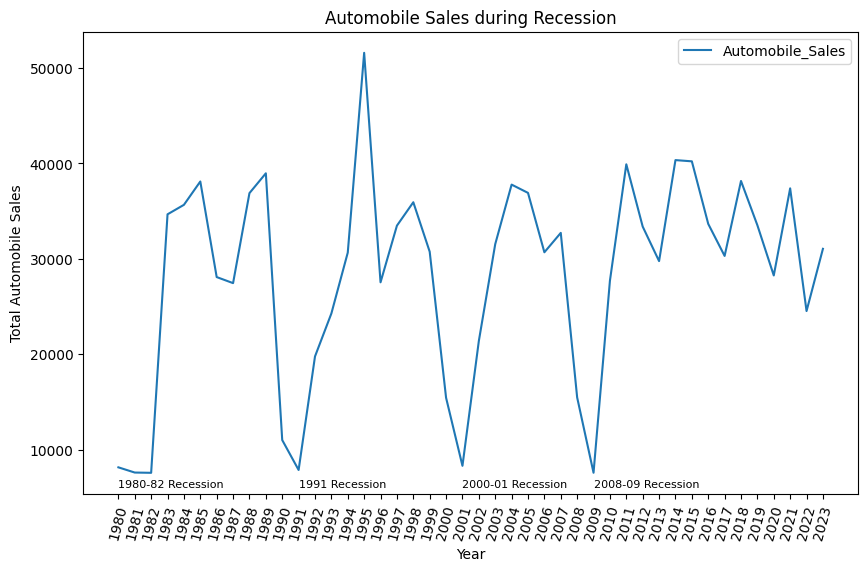

In [ ]:
plt.figure(figsize=(10, 6))

df_line = df.groupby('Year')['Automobile_Sales'].sum()

df_line.plot(kind='line')

plt.xticks(list(range(1980, 2024)), rotation=75)

plt.xlabel('Year')

plt.ylabel('Total Automobile Sales')

plt.title('Automobile Sales during Recession')
plt.text(1980, 6000, '1980-82 Recession', fontsize=8)
plt.text(1991, 6000, '1991 Recession', fontsize=8)
plt.text(2001, 6000, '2000-01 Recession', fontsize=8)
plt.text(2009, 6000, '2008-09 Recession', fontsize=8)

plt.legend()
plt.show()

---



####  Plotting different lines for categories of vehicle type and analyse the trend to answer the question: Is there a noticeable difference in sales trends between different vehicle types during recession periods?


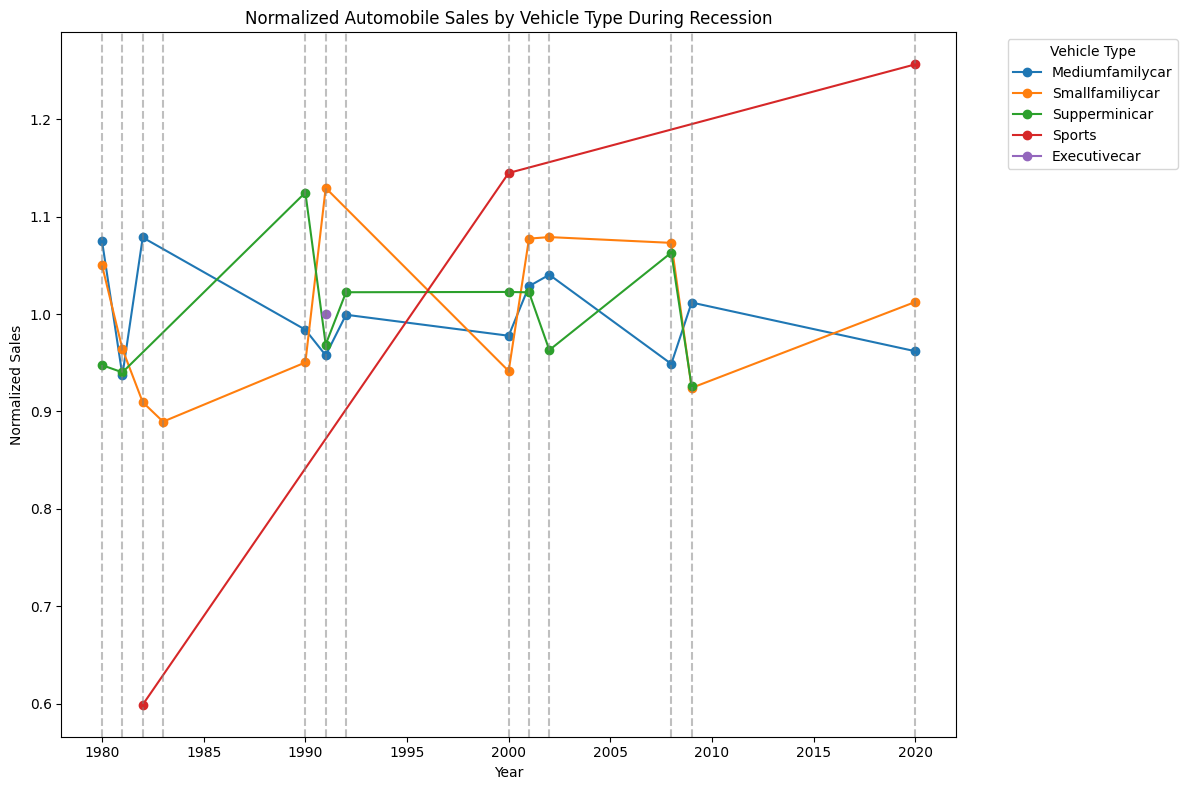

In [ ]:
df_reces = df[df['Recession']==1]

# groupby
df_Mline = df_reces.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# create new column
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# set year as index
df_Mline.set_index('Year', inplace=True)

# create the plot for each vehicle type
plt.figure(figsize = (12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# focus on recession years
recession_years = df_reces['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

plt.tight_layout()
plt.show()

#### Insights from the plot above:

Sports cars and superminis tend to stay strong or grow during recessions. Medium and small family cars are more affected by the economy. Rising sales of sports cars suggest the luxury market remains stable even in tough times.

----


### Creating a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period


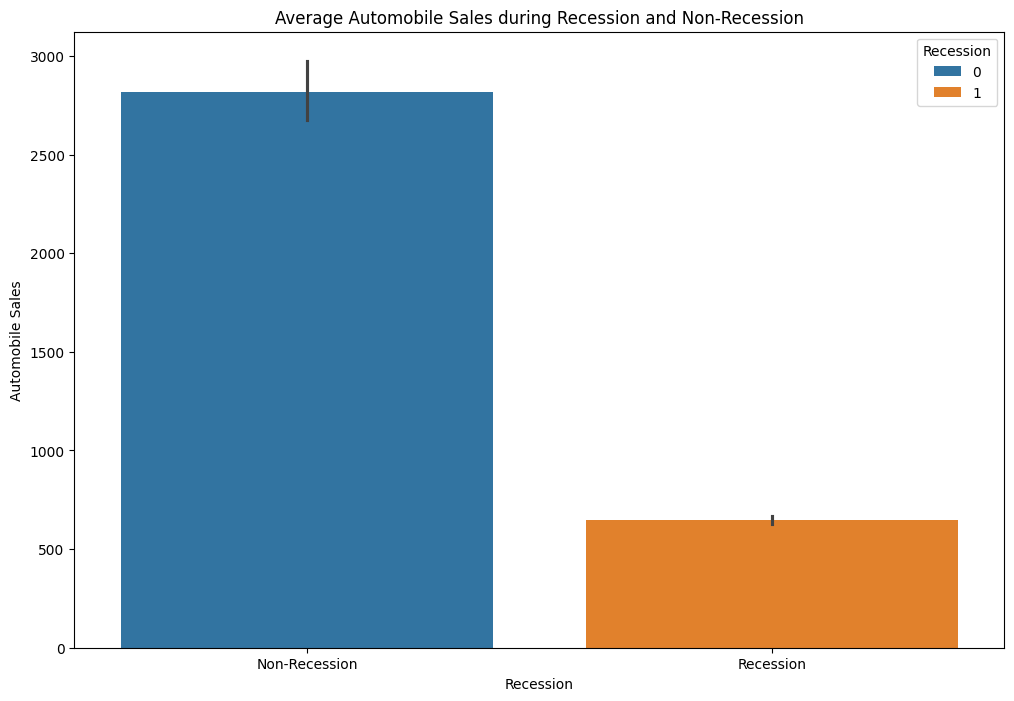

In [ ]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=df)
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

### Comparing the sales of different vehicle types during a recession and a non-recession period



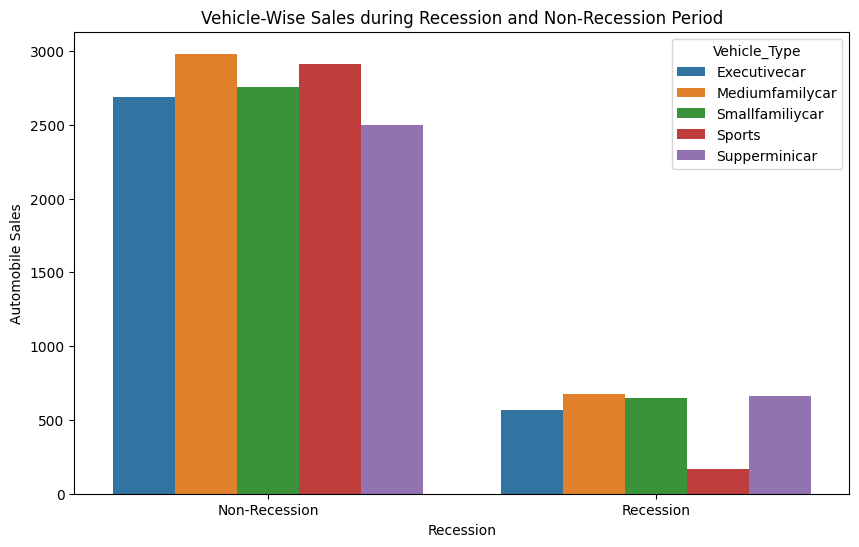

In [ ]:
grouped_df = df.groupby(['Recession', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean().reset_index()
# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=grouped_df)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

### Insights  


The plot shows a sharp drop in overall car sales during the recession, with executive cars and sports cars being the most affected.

### Using Sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.



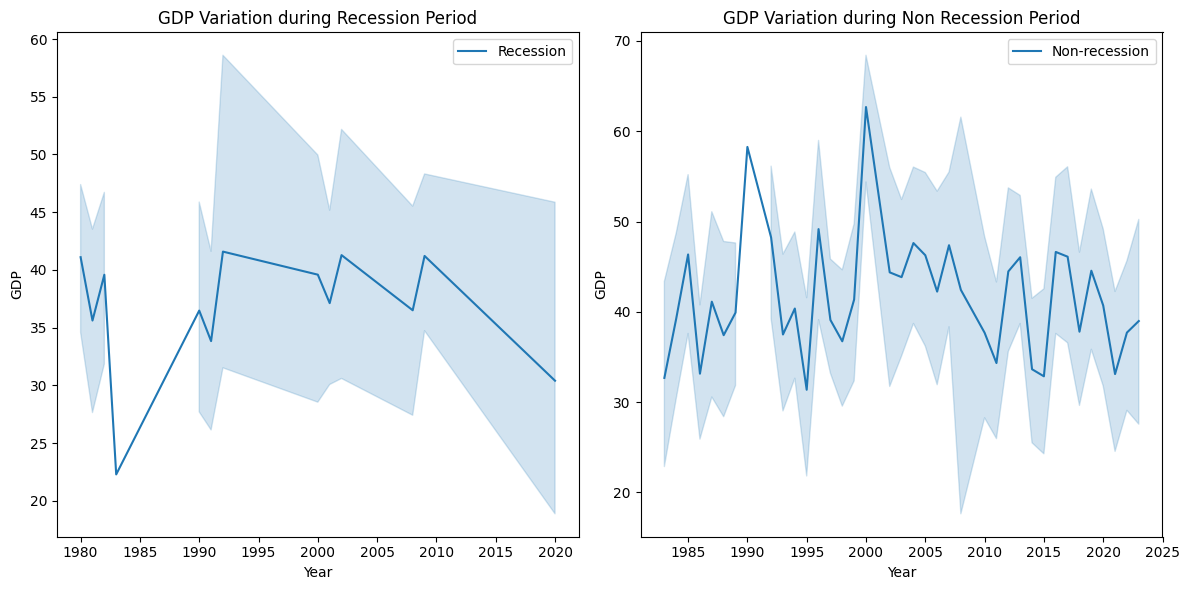

In [ ]:
    #Create dataframes
    rec_data = df[df['Recession'] == 1]
    non_rec_data = df[df['Recession'] == 0]

    #Figure
    fig=plt.figure(figsize=(12, 6))

    #Create different axes for subploting
    ax0 = fig.add_subplot(1, 2, 1) # first plot
    ax1 = fig.add_subplot(1, 2, 2) # second plot

    # ax0
    sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
    ax0.set_xlabel('Year')
    ax0.set_ylabel('GDP')
    ax0.set_title('GDP Variation during Recession Period')

    # ax1
    sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-recession',ax=ax1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('GDP')
    ax1.set_title('GDP Variation during Non Recession Period')

    plt.tight_layout()
    plt.show()

### Insights
From this plot, it is evident that during recession, the GDP of the country was in a low range, might have afected the overall sales of the company


---


### Creating a Bubble plot for displaying the impact of seasonality on Automobile Sales.

In [ ]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


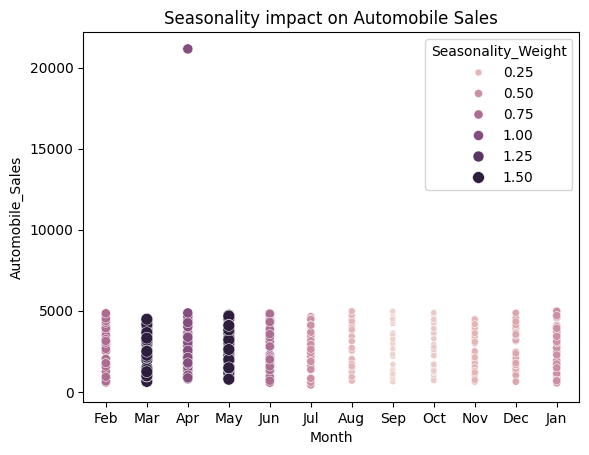

In [ ]:
size=non_rec_data['Seasonality_Weight']

sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=True)

plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

### Insights
From this plot, it is evident that seasonality has not affected on the overall sales. However, there is a drastic raise in sales in the month of April

---


 ### Creating a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.


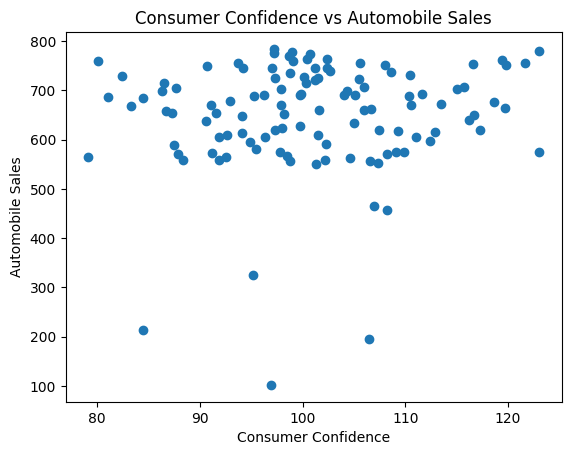

In [ ]:
df_rec = df[df['Recession'] == 1]
plt.scatter(df_rec['Consumer_Confidence'], df_rec['Automobile_Sales'])

plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence vs Automobile Sales')
plt.show()


 ### How does the average vehicle price relate to the sales volume during recessions?


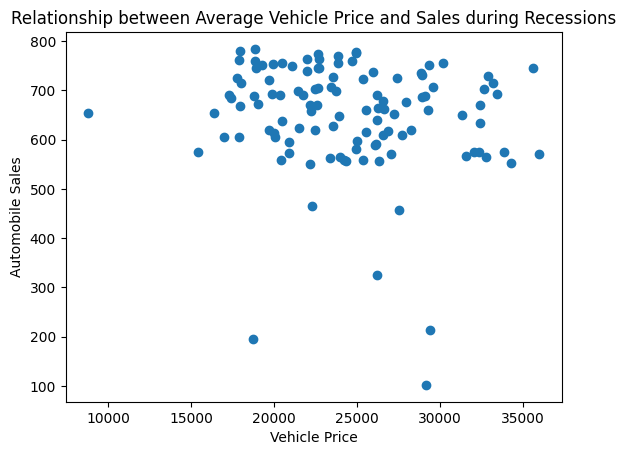

In [ ]:
df_rec = df[df['Recession'] == 1]

plt.scatter(df_rec['Price'], df_rec['Automobile_Sales'])

plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Vehicle Price')
plt.ylabel('Automobile Sales')

plt.show()

### Insights
There is not much relation!


----


 ### Creating a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


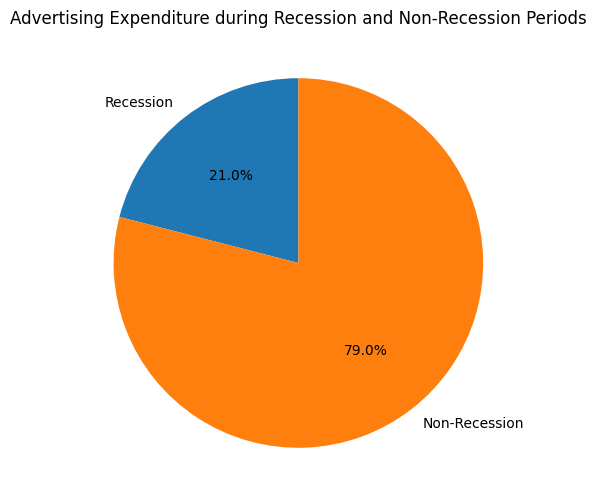

In [ ]:
df_rec = df[df['Recession']==1]
df_nonrec = df[df['Recession']==0]

ad_rec_total = df_rec['Advertising_Expenditure'].sum()
ad_nonrec_total = df_nonrec['Advertising_Expenditure'].sum()

plt.figure(figsize=(6,6))

labels = ['Recession', 'Non-Recession']
sizes = [ad_rec_total, ad_nonrec_total]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()

#### Insights:

XYZAutomotives seems to spend more on advertising during non-recession period rather than recession periods.

---


### Creating a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.


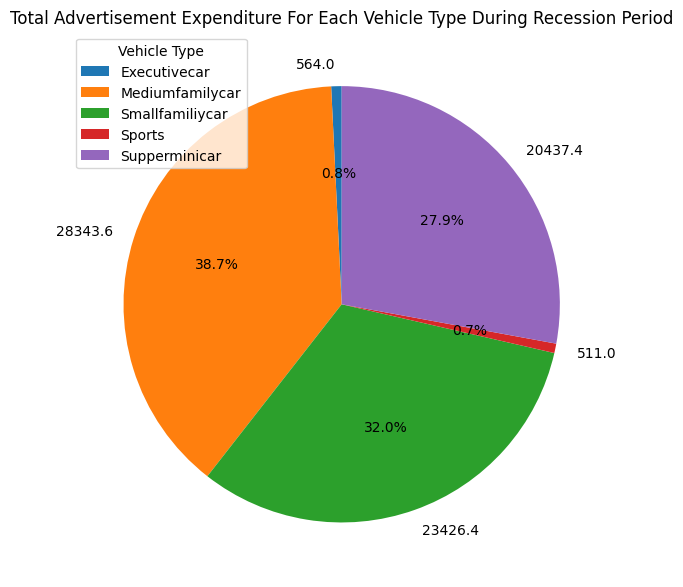

In [ ]:
df_rec = df[df['Recession']==1]

vtype_sales = df_rec.groupby('Vehicle_Type')['Automobile_Sales'].sum()

plt.figure(figsize=(6,6))

plt.pie(vtype_sales.values, labels=vtype_sales.values, autopct='%1.1f%%', startangle=90)
plt.title('Total Advertisement Expenditure For Each Vehicle Type During Recession Period')

plt.legend(vtype_sales.index, title='Vehicle Type', loc='best')

plt.tight_layout()
plt.show()

### Inference:
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!


 ### Creating a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.

In [ ]:
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


/tmp/ipython-input-21-1579690622.py:2: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o',err_style=None)


Text(0.5, 1.0, 'Effect of Unemployment Rate on Vehicle Type and Sales')

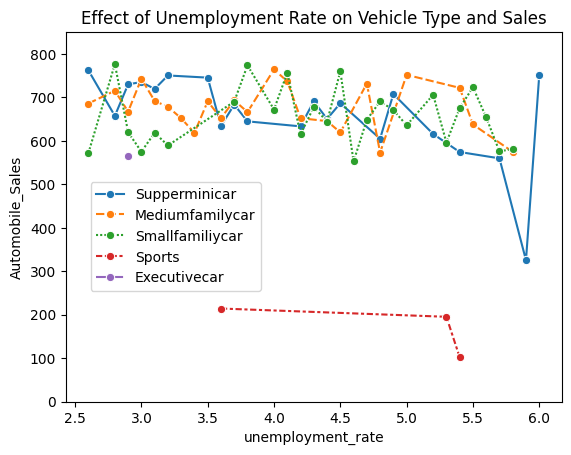

In [ ]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', style='Vehicle_Type', markers='o',err_style=None)
plt.ylim(0, 850)
plt.legend(loc=(0.05, 0.3))
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')

**Insight:**
During the recession, buying patterns shifted, with increased demand for lower-priced vehicles like superminis, small family cars, and medium minicars.

Creating a map on the hightest sales region/offices of the company during recession period (United States)


In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

df_rec = df[df['Recession'] == 1]

sales_by_city = df_rec.groupby('City')['Automobile_Sales'].sum().reset_index()

sales_by_city

,City,Automobile_Sales
0,California,18982.6
1,Georgia,17470.5
2,Illinois,16874.7
3,New York,19954.6


In [ ]:
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data = path,
    data = sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

choropleth.geojson.add_child(folium.features.GeoJsonTooltip(['name'], labels=True))

map1

The end!